<a href="https://colab.research.google.com/github/Jiuminglu/machine_learning/blob/master/TimeSeriesCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Generate Sample Test Data

7200
1800


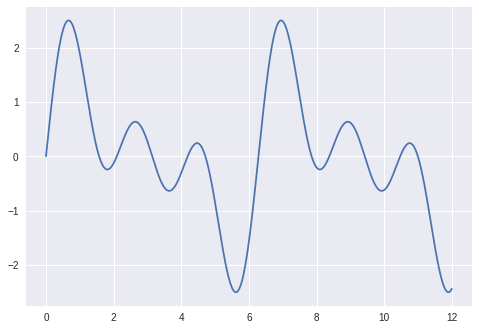

In [0]:
X = np.linspace(0, 15, 9000)
y1 = np.sin(X)
y2 = np.sin(2 * X)
y3 = np.sin(3 * X)
Y = y1 + y2 + y3

prop   = 0.8
amount = int(prop * len(X))

train_X = X[:amount]
train_Y = Y[:amount]
test_X  = X[amount:]
test_Y  = Y[amount:]

print(len(train_X))
print(len(test_X))


plt.plot(train_X, train_Y)
plt.show()

## Model

In [0]:
BATCH_SIZE = len(test_X)
SEQ_LENGTH = 16


input_x     = tf.placeholder(dtype=tf.float32, shape=[BATCH_SIZE, SEQ_LENGTH])
input_layer = tf.reshape(input_x, shape=(BATCH_SIZE, -1, 2))
output_y    = tf.placeholder(dtype=tf.float32, shape=[BATCH_SIZE, 1])

cnn1 = tf.layers.conv1d(inputs=input_layer, 
                        filters=5, 
                        kernel_size=1, 
                        padding='valid', 
                        activation='relu')
cnn1_pool = tf.math.reduce_max(cnn1, axis=2)
cnn1_final = tf.reshape(cnn1_pool, shape=(BATCH_SIZE, -1, 2))


cnn2 = tf.layers.conv1d(inputs=cnn1_final, 
                        filters=5,
                        kernel_size=1, 
                        padding='valid', 
                        activation='relu')
cnn2_pool  = tf.math.reduce_max(cnn2, axis=2)
cnn2_final = tf.reshape(cnn2_pool, shape=(BATCH_SIZE, -1, 2))

cnn3 = tf.layers.conv1d(inputs=cnn2_final, 
                        filters=5, 
                        kernel_size=1, 
                        padding='valid', 
                        activation='relu')
cnn3_pool = tf.math.reduce_max(cnn3, axis=2)
cnn3_final = tf.reshape(cnn3_pool, shape=(BATCH_SIZE, -1, 2))

cnn4 = tf.layers.conv1d(inputs=cnn3_final, 
                        filters=5, 
                        kernel_size=1, 
                        padding='valid', 
                        activation=None)
cnn4_pool = tf.math.reduce_max(cnn4, axis=2)
cnn4_final = tf.reshape(cnn4_pool, shape=(BATCH_SIZE, 1))

loss = tf.losses.mean_squared_error(cnn4_final, output_y)
optimizer = tf.train.RMSPropOptimizer(0.05).minimize(loss)

## Training Batch Generation

In [0]:
import random

def next_batch(train_X, train_Y):
    x_examples = []
    y_examples = []
    for i in range(BATCH_SIZE):
        idx = random.randint(0, len(train_X) - 1 - SEQ_LENGTH)
        x_examples.append(train_X[idx : idx + SEQ_LENGTH])
        y_examples.append([train_Y[idx + SEQ_LENGTH]])
    return x_examples, y_examples

X_batch, Y_batch = next_batch(train_Y, train_Y)


## Training

In [0]:
sess = tf.Session()
sess.run(tf.initializers.global_variables())

In [0]:

for i in range(20000):
    X_batch, Y_batch = next_batch(train_Y, train_Y)
    _, loss_ = sess.run([optimizer, loss], feed_dict = {
        input_x : X_batch,
        output_y: Y_batch
    })

    if i % 500 == 0:
        print(i, loss_)


0 2.874125
500 0.04133728
1000 0.44666186
1500 0.31003013
2000 0.23206449
2500 0.29815748
3000 0.23383564
3500 0.30260247
4000 0.2984502
4500 0.27690643
5000 0.20199585
5500 0.063968986
6000 0.2686089
6500 0.2415679
7000 0.039913144
7500 0.16923909
8000 0.32776877
8500 0.19135521
9000 1.0373476
9500 0.26874194
10000 0.28407088
10500 0.19270545
11000 0.35711935
11500 0.17627761
12000 0.24695367
12500 0.17796656
13000 0.2156141
13500 0.8316065
14000 0.16081803
14500 0.20515765
15000 0.036424696
15500 0.35932955
16000 0.24514651
16500 0.246298
17000 0.18604651
17500 0.33441824
18000 0.17071009
18500 0.27542612
19000 0.2835911
19500 0.16564159


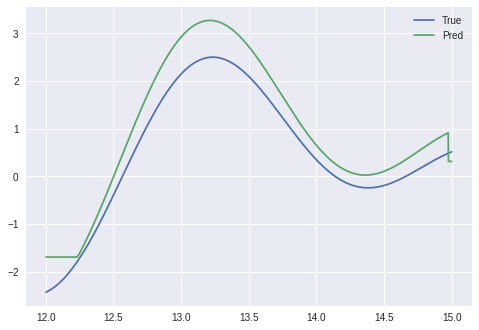

In [0]:
# Test

final_pred_Y = []

X_batch = []
for i in range(BATCH_SIZE - SEQ_LENGTH):
    X = test_Y[i: i+SEQ_LENGTH]
    X_batch.append(X)

for i in range(SEQ_LENGTH):
    X_batch.append([0 for i in range(SEQ_LENGTH)])


Y_true  = test_Y
Y_pred  = sess.run([cnn4_final], feed_dict = {
    input_x : X_batch
})

plt.plot(test_X, Y_true, label='True')
plt.plot(test_X, Y_pred[0], label='Pred')
plt.legend()
plt.show()
